In [56]:
import glob
import argparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

evaluation_methods = ['ari', 'nmi', 'purity']
ari_best_result = dict()
nmi_best_result = dict()
purity_best_result = dict()


In [57]:
for dirs in glob.glob('b10_p100/*'):
    for em in evaluation_methods:
        with open(dirs + '/' + em + '/total_best_result.txt') as f:
            lines = f.read().splitlines()
            for i, line in enumerate(lines):
                if i == 0: continue
                line = line.split('=')[-1].split(':')
                v = line[-1].strip()
                k = int(dirs.split('csv_')[-1].split('_')[-1])
                if k in range(5):
                    k = 0
                
                if em == 'ari':
                    if k in ari_best_result:
                        ari_best_result[k] += float(v)
                    else:
                        ari_best_result[k] = float(v)
                elif em == 'nmi':
                    if k in nmi_best_result:
                        nmi_best_result[k] += float(v)
                    else:
                        nmi_best_result[k] = float(v)
                else:
                    if k in purity_best_result:
                        purity_best_result[k] += float(v.split('%')[0])
                    else:
                        purity_best_result[k] = float(v.split('%')[0])

In [58]:
for k, v in ari_best_result.items():
    ari_best_result[k] = round(v / 5, 3)
for k, v in nmi_best_result.items():
    nmi_best_result[k] = round(v / 5, 3)
for k, v in purity_best_result.items():
    purity_best_result[k] = round(v / (5 * 100), 3)

print(ari_best_result)
print(nmi_best_result)
print(purity_best_result)

{1000: 0.264, 1700: 0.268, 800: 0.266, 2300: 0.259, 1100: 0.265, 900: 0.258, 500: 0.26, 1800: 0.263, 1900: 0.265, 1400: 0.266, 1500: 0.264, 2400: 0.259, 0: 0.263, 1200: 0.263, 200: 0.251, 700: 0.256, 2200: 0.254, 1600: 0.26, 600: 0.26, 2100: 0.261, 2000: 0.262, 1300: 0.262, 100: 0.265, 400: 0.269, 300: 0.267}
{1000: 0.527, 1700: 0.531, 800: 0.528, 2300: 0.523, 1100: 0.527, 900: 0.523, 500: 0.524, 1800: 0.526, 1900: 0.527, 1400: 0.53, 1500: 0.528, 2400: 0.52, 0: 0.525, 1200: 0.527, 200: 0.517, 700: 0.524, 2200: 0.518, 1600: 0.524, 600: 0.525, 2100: 0.524, 2000: 0.524, 1300: 0.525, 100: 0.529, 400: 0.532, 300: 0.532}
{1000: 0.333, 1700: 0.347, 800: 0.331, 2300: 0.35, 1100: 0.341, 900: 0.339, 500: 0.298, 1800: 0.333, 1900: 0.35, 1400: 0.328, 1500: 0.349, 2400: 0.345, 0: 0.348, 1200: 0.319, 200: 0.304, 700: 0.305, 2200: 0.341, 1600: 0.34, 600: 0.334, 2100: 0.346, 2000: 0.339, 1300: 0.354, 100: 0.287, 400: 0.316, 300: 0.315}


In [59]:
df_ari = pd.DataFrame(list(ari_best_result.items()), columns=['parameters', 'ari'])
df_nmi = pd.DataFrame(list(nmi_best_result.items()), columns=['parameters', 'nmi'])
df_purity = pd.DataFrame(list(purity_best_result.items()), columns=['parameters', 'purity'])


In [60]:
# Adjust values with previous experiments
df_ari.loc[df_ari['parameters'] == 0, 'ari'] = 0.267
df_nmi.loc[df_nmi['parameters'] == 0, 'nmi'] = 0.533
df_purity.loc[df_purity['parameters'] == 0, 'purity'] = 0.316


In [61]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Text(0.5, 0, 'epochs')

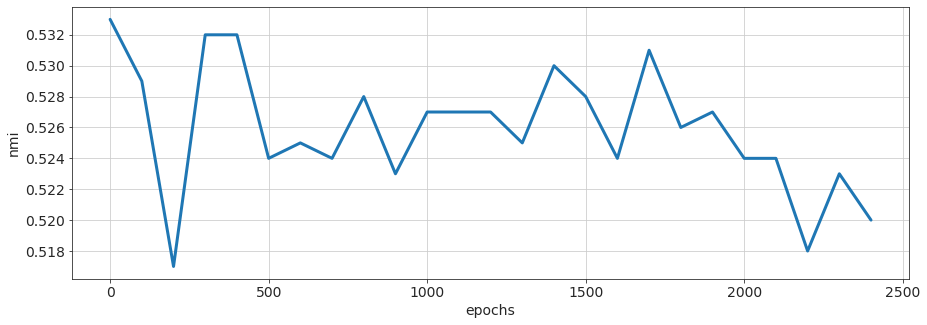

In [62]:
plt.figure(figsize=(15,5))
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#455E85']
sns.lineplot(x='parameters', y='nmi', data=df_nmi, linewidth=3, palette=colors)
plt.xlabel('epochs')


Text(0.5, 0, 'epochs')

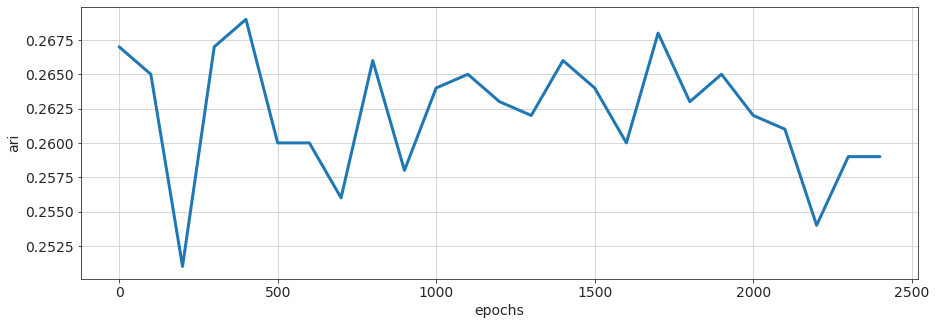

In [63]:
plt.figure(figsize=(15,5))
colors = ['#455E85']
sns.lineplot(x='parameters', y='ari', data=df_ari, linewidth=3, palette=colors)
plt.xlabel('epochs')

In [64]:
df_purity.iloc[1]['purity']

0.347

Text(0.5, 0, 'epochs')

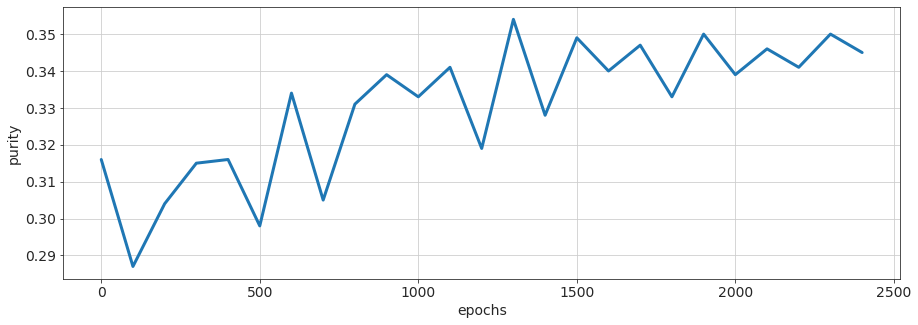

In [65]:
plt.figure(figsize=(15,5))
colors = ['#455E85']
sns.lineplot(x='parameters', y='purity', data=df_purity, linewidth=3, palette=colors)
#for i in df_purity['parameters']:
#  plt.text(i - 0.2 , df_purity.iloc[i]['purity'] + 0.0051, df_purity.iloc[i]['purity'])
#plt.ylim(0.34, 0.56)
#plt.ylabel('NMI' + r' ($\beta$=0.2)', fontsize=16)
plt.xlabel('epochs')
#plt.legend(loc='best')